# LetsGrowMore - InternshipJan2022

# Task :- Prediction Using Decision Tree Algorithm

# By :- Santana Acharjya

In [1]:
# Importing multiple library to read  , analysed and visualised the dataset 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the Iris.csv file

Iris_data = pd.read_csv('C:/users/shwetha/downloads/Iris.csv')


In [3]:
# Basic Information regarding data

Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
Iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
Iris_data.shape

(150, 6)

In [6]:
# describe function gives numerical info about all the numerical columns

Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# checking for duplicate values in our dataset

Iris_data.duplicated().sum()

0

In [8]:
# checking missing values

Iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# count value of each class table 

Iris_data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Visualizing the Dataset

Id
Feature: Id


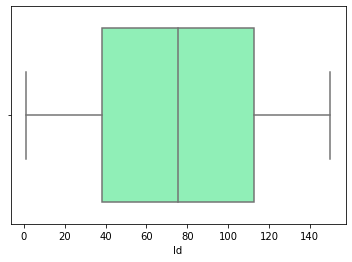

SepalLengthCm
Feature: SepalLengthCm


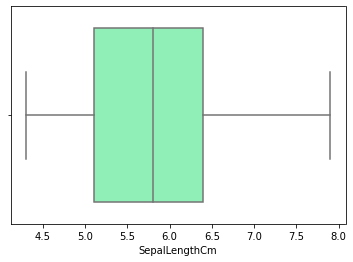

SepalWidthCm
Feature: SepalWidthCm


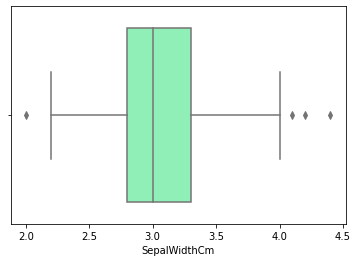

PetalLengthCm
Feature: PetalLengthCm


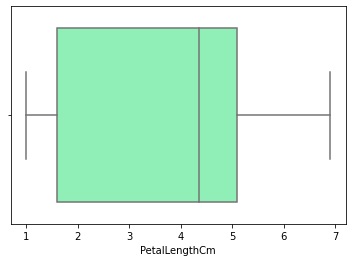

PetalWidthCm
Feature: PetalWidthCm


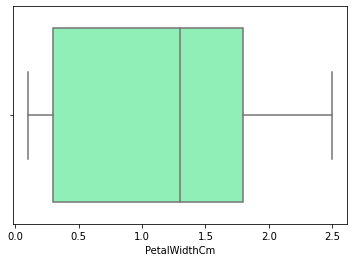

In [10]:
for i in Iris_data.columns[:-1]:
    print(i)
    sns.boxplot(x = Iris_data[i] , data = Iris_data , palette = 'rainbow')
    print("Feature:",i)
    plt.show()

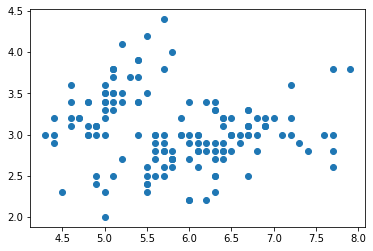

In [11]:
#  visulization the dataset features to find pattern to solve our task 

plt.scatter(Iris_data['SepalLengthCm'],Iris_data['SepalWidthCm'])
plt.show()


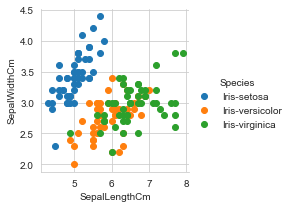

In [12]:
# using seaborn lib to visulization 2 features based on target variable

sns.set_style('whitegrid')
sns.FacetGrid(Iris_data,hue = 'Species')\
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm')\
   .add_legend()

plt.show()

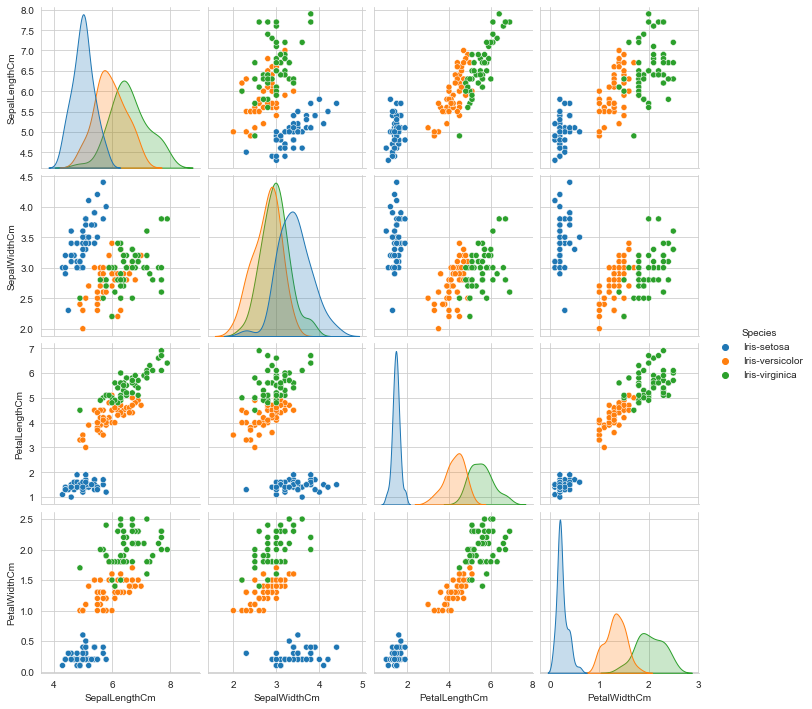

In [13]:
# pair plot gives the relationship b/w all features distribution with each other ..

sns.pairplot(Iris_data.drop(['Id'],axis=1),hue = 'Species')
plt.show()

# Exploring Some New Features

In [14]:
Iris_data['Sepal_diff'] = Iris_data['SepalLengthCm'] = Iris_data['SepalWidthCm']
Iris_data['Petal_diff'] = Iris_data['PetalLengthCm'] = Iris_data['PetalWidthCm']

In [15]:
Iris_data['Sepal_petal_len_diff'] = Iris_data['SepalLengthCm'] = Iris_data['PetalLengthCm']
Iris_data['Sepal_petal_width_diff'] = Iris_data['SepalWidthCm'] = Iris_data['PetalWidthCm']
Iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff
0,1,0.2,0.2,0.2,0.2,Iris-setosa,3.5,0.2,0.2,0.2
1,2,0.2,0.2,0.2,0.2,Iris-setosa,3.0,0.2,0.2,0.2
2,3,0.2,0.2,0.2,0.2,Iris-setosa,3.2,0.2,0.2,0.2
3,4,0.2,0.2,0.2,0.2,Iris-setosa,3.1,0.2,0.2,0.2
4,5,0.2,0.2,0.2,0.2,Iris-setosa,3.6,0.2,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...
145,146,2.3,2.3,2.3,2.3,Iris-virginica,3.0,2.3,2.3,2.3
146,147,1.9,1.9,1.9,1.9,Iris-virginica,2.5,1.9,1.9,1.9
147,148,2.0,2.0,2.0,2.0,Iris-virginica,3.0,2.0,2.0,2.0
148,149,2.3,2.3,2.3,2.3,Iris-virginica,3.4,2.3,2.3,2.3


In [16]:
Iris_data['Sepal_petal_len_wid_diff'] = Iris_data['SepalLengthCm'] = Iris_data['PetalWidthCm']
Iris_data['Sepal_petal_wid_len_diff'] = Iris_data['SepalWidthCm'] = Iris_data['PetalLengthCm']
Iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,1,0.2,0.2,0.2,0.2,Iris-setosa,3.5,0.2,0.2,0.2,0.2,0.2
1,2,0.2,0.2,0.2,0.2,Iris-setosa,3.0,0.2,0.2,0.2,0.2,0.2
2,3,0.2,0.2,0.2,0.2,Iris-setosa,3.2,0.2,0.2,0.2,0.2,0.2
3,4,0.2,0.2,0.2,0.2,Iris-setosa,3.1,0.2,0.2,0.2,0.2,0.2
4,5,0.2,0.2,0.2,0.2,Iris-setosa,3.6,0.2,0.2,0.2,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,2.3,2.3,2.3,2.3,Iris-virginica,3.0,2.3,2.3,2.3,2.3,2.3
146,147,1.9,1.9,1.9,1.9,Iris-virginica,2.5,1.9,1.9,1.9,1.9,1.9
147,148,2.0,2.0,2.0,2.0,Iris-virginica,3.0,2.0,2.0,2.0,2.0,2.0
148,149,2.3,2.3,2.3,2.3,Iris-virginica,3.4,2.3,2.3,2.3,2.3,2.3


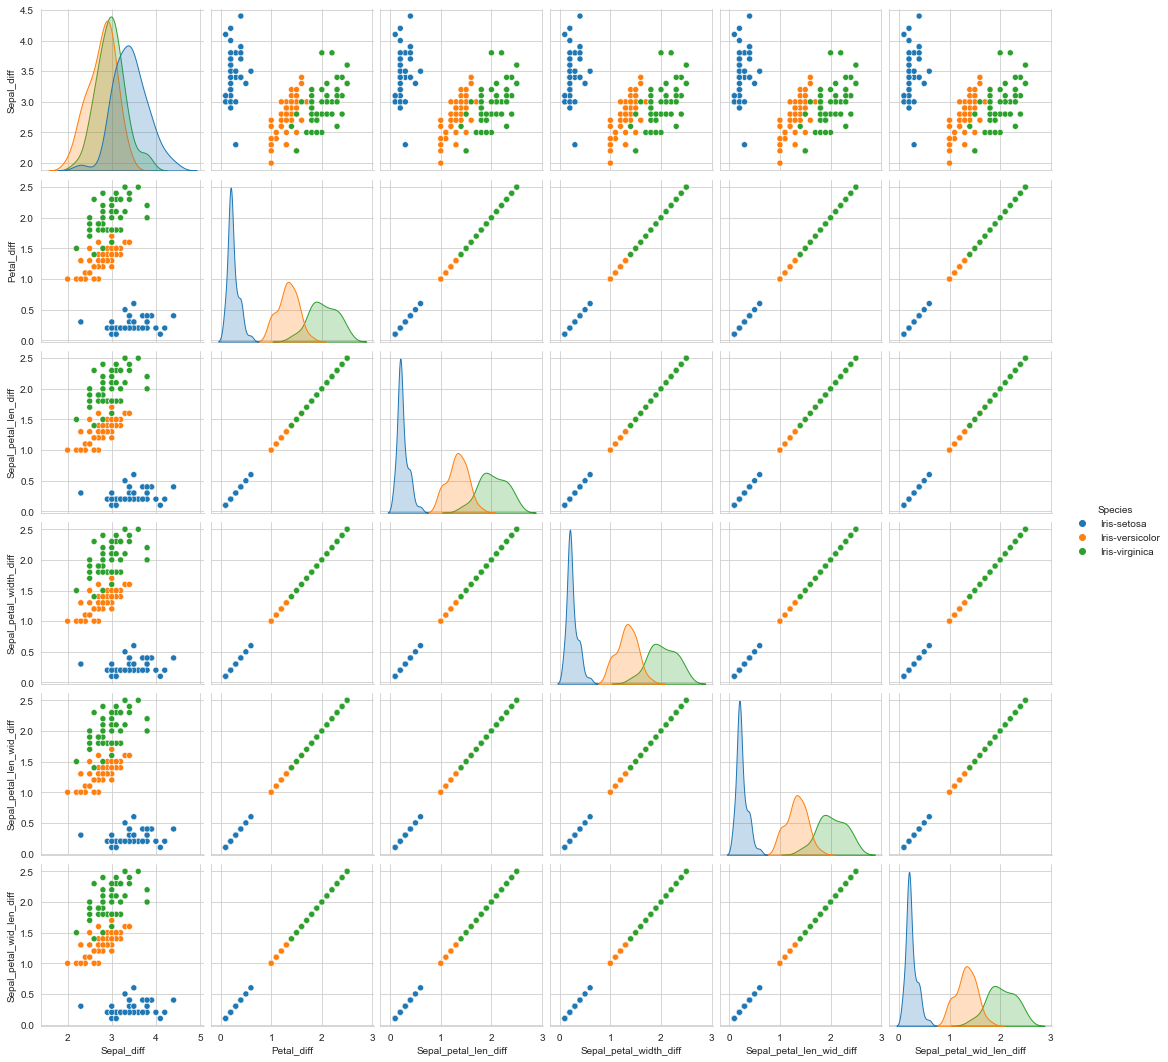

In [17]:
# Finding Relation between new feature based on class labels..

sns.pairplot(Iris_data[['Species', 'Sepal_diff', 'Petal_diff', 'Sepal_petal_len_diff',\
                        'Sepal_petal_width_diff', 'Sepal_petal_len_wid_diff',\
                        'Sepal_petal_wid_len_diff']], hue='Species')
plt.show()

#  Building Classification Model

In [18]:
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = Iris_data.drop(["Species"], axis = 1)
Y = Iris_data["Species"]

print(X)
print(Y)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            0.2           0.2            0.2           0.2   
1      2            0.2           0.2            0.2           0.2   
2      3            0.2           0.2            0.2           0.2   
3      4            0.2           0.2            0.2           0.2   
4      5            0.2           0.2            0.2           0.2   
..   ...            ...           ...            ...           ...   
145  146            2.3           2.3            2.3           2.3   
146  147            1.9           1.9            1.9           1.9   
147  148            2.0           2.0            2.0           2.0   
148  149            2.3           2.3            2.3           2.3   
149  150            1.8           1.8            1.8           1.8   

     Sepal_diff  Petal_diff  Sepal_petal_len_diff  Sepal_petal_width_diff  \
0           3.5         0.2                   0.2                     0.2   
1    

[Text(744.0, 1006.6666666666666, 'X[0] <= 100.5\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(496.0, 604.0, 'X[0] <= 50.5\ngini = 0.5\nsamples = 60\nvalue = [30, 30, 0]'),
 Text(248.0, 201.33333333333326, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(744.0, 201.33333333333326, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(992.0, 604.0, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

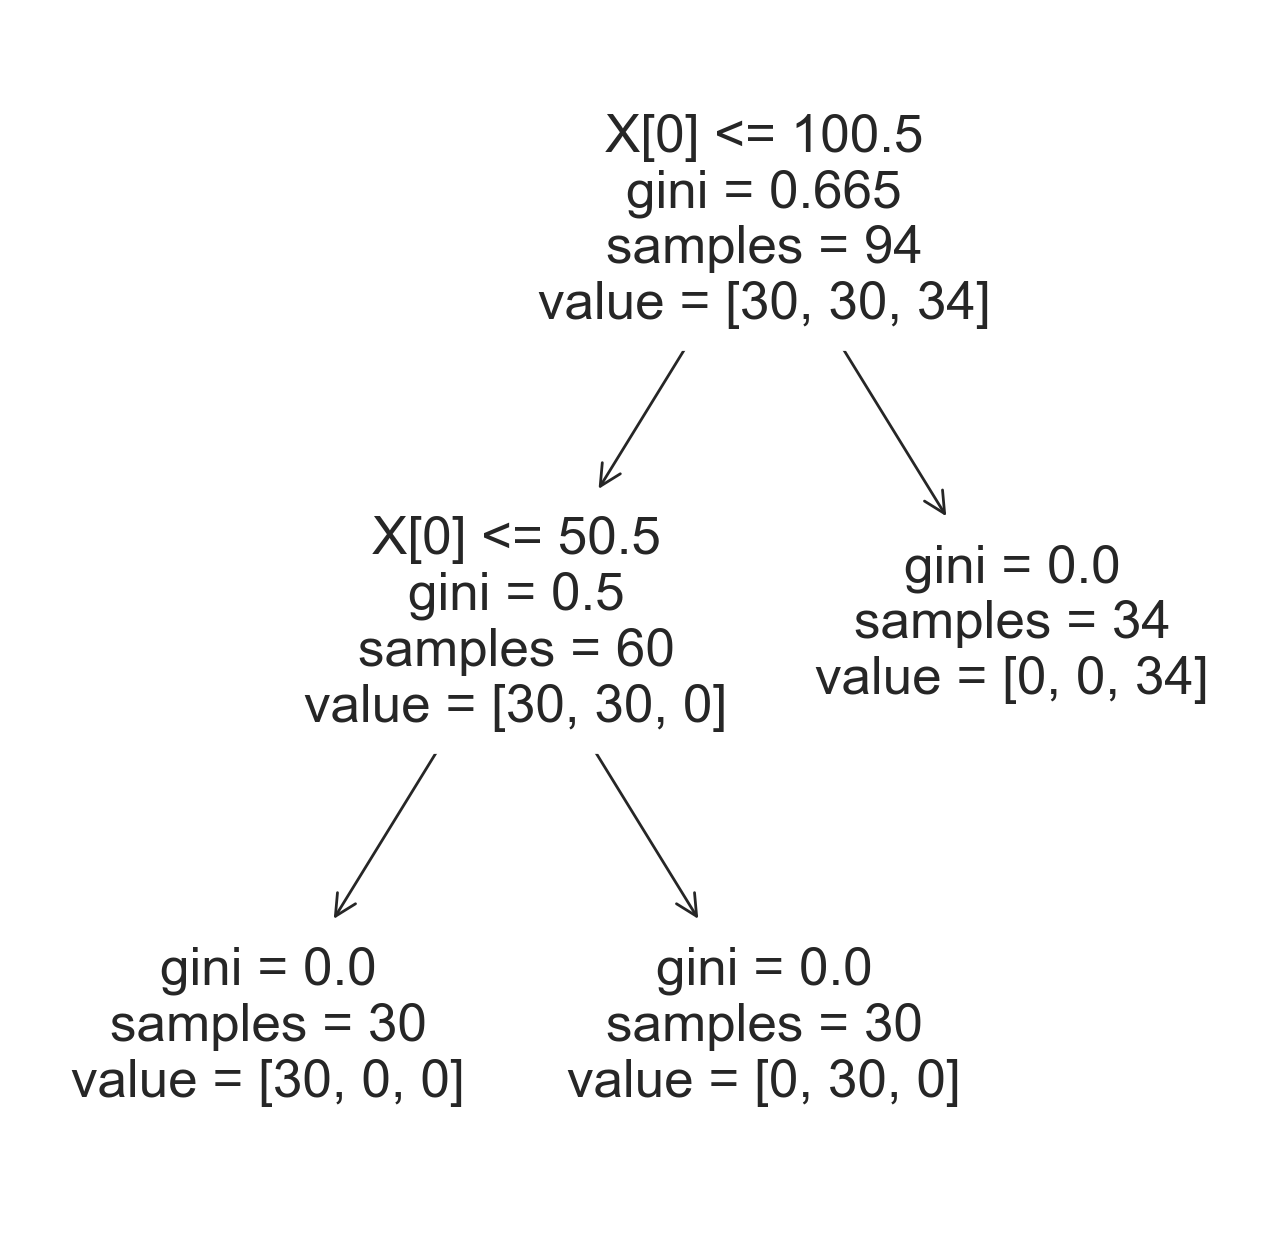

In [19]:
Xtrain, Xtest , Ytrain , Ytest = train_test_split(X,Y, test_size = 0.30, random_state = 42)
Xtrain , Xtest , Ytrain , Ytest = train_test_split(Xtrain, Ytrain, test_size =0.10, random_state =42)

Iris_clf = DecisionTreeClassifier(criterion='gini')
Iris_clf.fit(Xtrain,Ytrain)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize =(8,8), dpi = 200)
tree.plot_tree(Iris_clf)


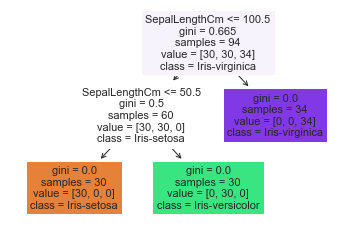

In [20]:
tree.plot_tree(Iris_clf,
              feature_names = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
              class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
              filled = True);

In [21]:
print("Accuracy score:", cross_val_score(Iris_clf, Xtrain, Ytrain, cv = 3, n_jobs = -1,
                                         scoring ="accuracy", verbose=0).mean())
                                        

Accuracy score: 0.9684139784946236


In [22]:
Ypred = Iris_clf.predict(Xtest)

In [23]:
print("Accuracyscore for validation test data:", accuracy_score(Ytest, Ypred))

Accuracyscore for validation test data: 1.0


In [24]:
Iris_clf = DecisionTreeClassifier(criterion ="gini", min_samples_split = 2)
Iris_clf.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

[Text(744.0, 1006.6666666666666, 'X[0] <= 100.5\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(496.0, 604.0, 'X[4] <= 0.8\ngini = 0.5\nsamples = 60\nvalue = [30, 30, 0]'),
 Text(248.0, 201.33333333333326, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(744.0, 201.33333333333326, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(992.0, 604.0, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

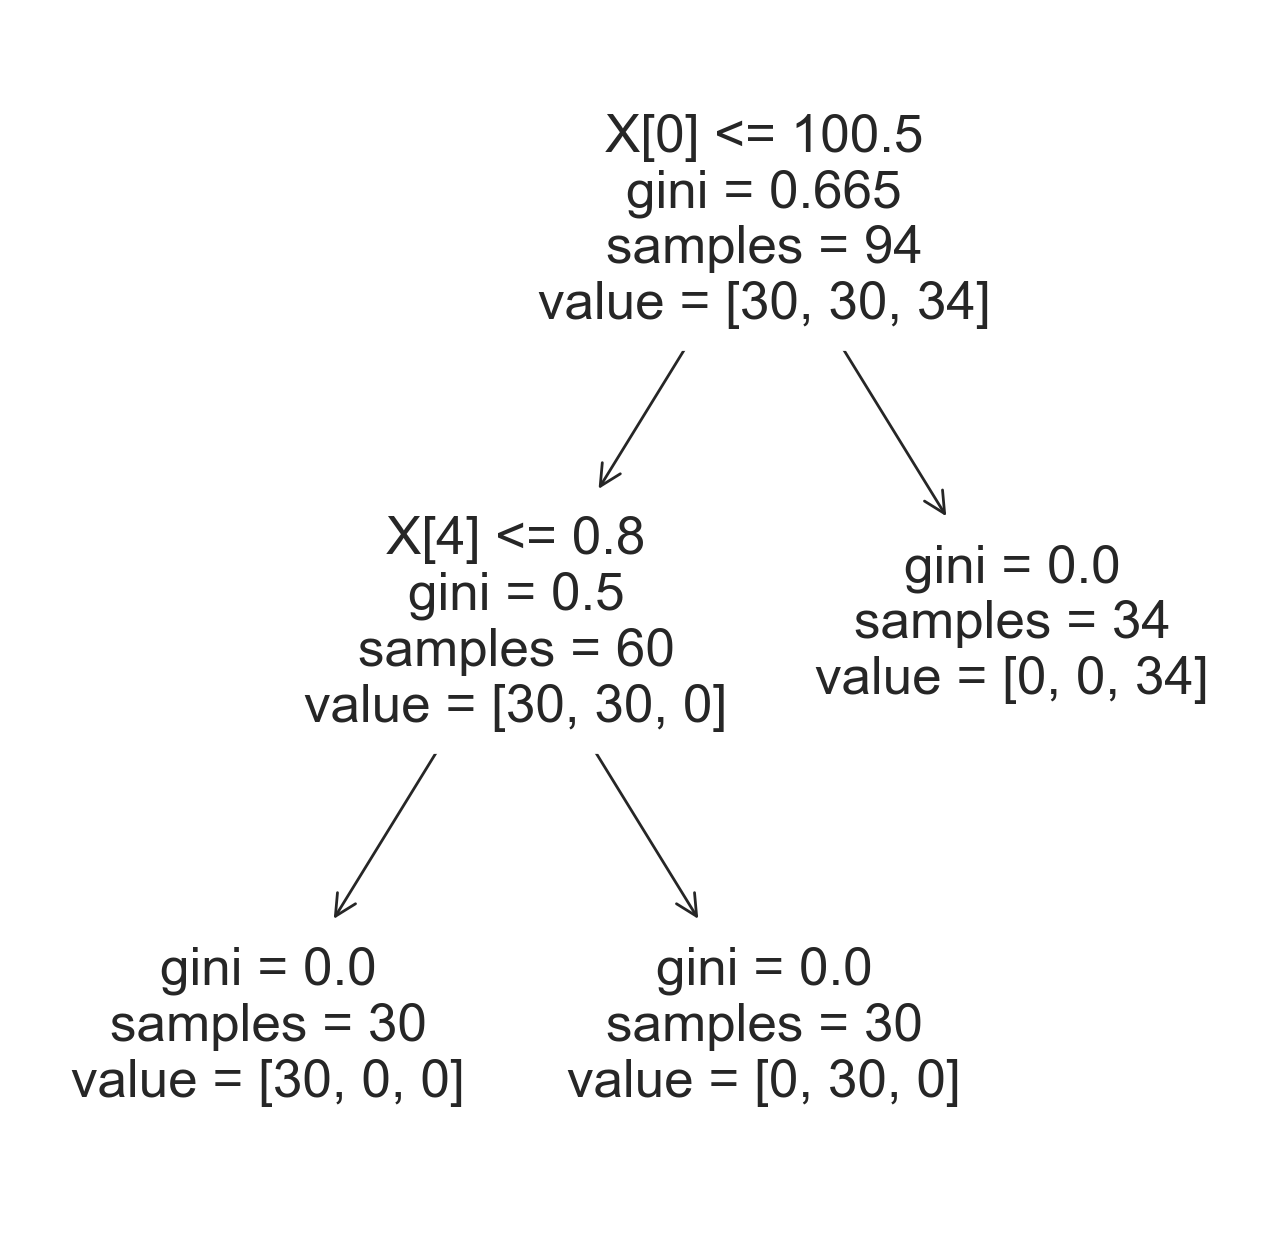

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8), dpi = 200)

tree.plot_tree(Iris_clf)

# Evaluting the model 

In [27]:
# checking model performance on actual test dataset

Ypred = Iris_clf.predict(Xtest)

print("Accuracy score on actual test dataset:", accuracy_score(Ytest, Ypred))

Accuracy score on actual test dataset: 1.0


In [28]:
print("Confusion Matrix: "'\n',confusion_matrix(Ytest, Ypred))

Confusion Matrix: 
 [[1 0 0]
 [0 7 0]
 [0 0 3]]


In [29]:
print("Classification_report:" , classification_report(Ytest, Ypred))

Classification_report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         1
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00         3

       accuracy                           1.00        11
      macro avg       1.00      1.00      1.00        11
   weighted avg       1.00      1.00      1.00        11

